In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
heart_df = pd.read_csv('data/heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Steps for successful project
- Read the data
- get information about data
- get distribution
- check for null values
# Exploratory data analysis
- identify categorical and continuous data
- visualize the data distribution (univariate and bivariate analysis)
- Clean the data if necessary
- Identify the target variables
- Perform principal component analysis and dimension reduction where necessary
# Train the model
- Test the model
- perform hyperparameter tuning
- Make inferences
- get score, confusion matrix, classification report

In [5]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [20]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [21]:
X= heart_df.drop(columns = ['target'])
y = heart_df.target

In [22]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
X_train.shape

(242, 13)

In [23]:
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

In [24]:
# #Train model
# knn_pipeline.fit(X_train, y_train)

In [18]:
GS = GridSearchCV(knn_pipeline, knn_param_grid, cv=5)
GS.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']})

In [27]:
GS.best_score_

0.8476190476190476

In [54]:
knn_pipeline_model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=10, weights='uniform'))
])

In [55]:
#without grid search optimization
knn_pipeline_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [35]:
y_pred = GS.predict(X_test)
print(y_pred)

[1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1
 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0]


In [56]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 10],
       [ 2, 25]], dtype=int64)

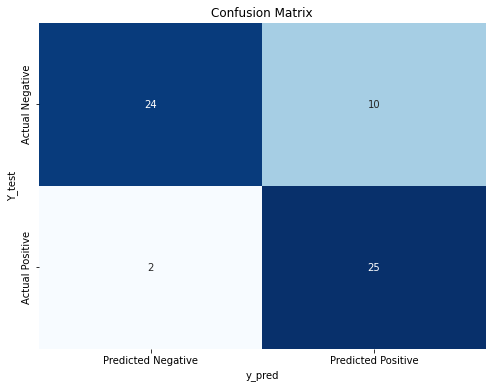

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('y_pred')
plt.ylabel('Y_test')
plt.title('Confusion Matrix')
plt.show()

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80        34
           1       0.71      0.93      0.81        27

    accuracy                           0.80        61
   macro avg       0.82      0.82      0.80        61
weighted avg       0.83      0.80      0.80        61



In [46]:
# y_pred = knn_pipeline.predict(X_test)
# y_pred.flatten()

# results = pd.DataFrame({
#     'y_pred':y_pred,
#     'y_test':y_test
# })

# results.head(20)

In [59]:
y_pred[:20]

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [60]:
y_pred1 = knn_pipeline_model.predict(X_test)
print(y_pred1[:20])

[1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1]


In [61]:
#without gridsearch score was lower
knn_pipeline_model.score(X_test,y_test)

0.7868852459016393

In [63]:
#with gridsearch model improved by 2%
GS.score(X_test,y_test)

0.8032786885245902